The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


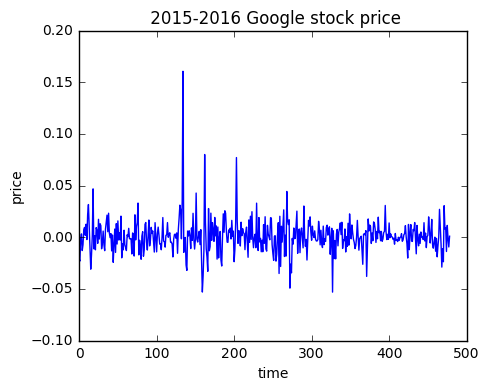

In [31]:
import numpy as np

import sys
if "../" not in sys.path:
    sys.path.append("../")
from tsap.solver import Solver
from tsap.model import AR, MA
from tsap.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array

import tsap.data_processor as dp
import tsap.inference 
from tsap.ts_gen import ar1_gen


import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

data = np.loadtxt("../data/GOOG.csv", delimiter=',')
X = np.array([data[0:480]])
Y = dp.get_return(X)
nrow=X.shape[0]


plt.plot(Y[0,:])
plt.xlabel('time')
plt.ylabel('price')
plt.title(' 2015-2016 Google stock price')
plt.show()



In [114]:

lag = 5
sigma = 1.0
intercept = 0.1
phi = np.random.randn(lag,1)
AR_model = AR(lag=lag, phi=phi, sigma=sigma, intercept=intercept)
AR_model.params

AR_solver = Solver(AR_model, Y,
                          update_rule='sgd_momentum',
                          optim_config={
                            'learning_rate': 1e-6,
                          },
                          
                          num_epochs=3000, batch_size=1,print_every=10)
AR_solver.train()
print AR_model.params



3000
the loss is 430.253935
the loss is 412.146926
the loss is 388.942897
the loss is 362.015646
the loss is 331.335921
the loss is 296.179386
the loss is 255.227146
the loss is 206.325582
the loss is 145.804687
the loss is 66.731364
the loss is -46.458306
the loss is -242.083762
the loss is -889.899309
{'phi': array([[ 0.13702195],
       [-1.72331626],
       [-0.33342519],
       [-0.63431413],
       [ 0.45486907]]), 'intercept': array([ 0.00013577]), 'sigma': array([ 0.07798653])}


[[ 0.00346535  0.00815387  0.0004395  -0.01989656 -0.00785229]]
[[ 0.00861254  0.00338436 -0.01660526 -0.01335022  0.00344957]]


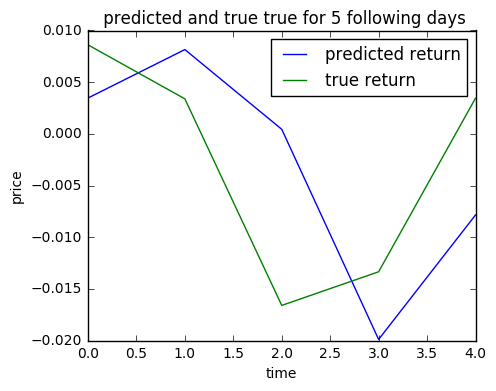

[[ 764.3194906   770.55165421  770.8903124   755.55225006  749.61943318]]
[[ 768.24  770.84  758.04  747.92  750.5 ]]


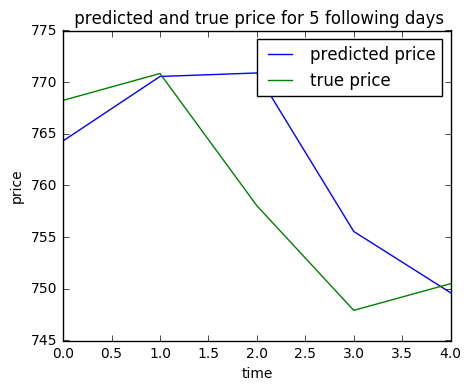

In [121]:
predreturn=AR_model.predict(Y,5)
print predreturn

truereturn=dp.get_return(np.array([data[479:485]]))
print truereturn

plt.plot(predreturn.T,label="predicted return")
plt.plot(truereturn.T,label="true return")
plt.xlabel("time")
plt.ylabel("price")
plt.title(' predicted and true true for 5 following days')
plt.legend()
plt.show()


predprice = dp.get_price(data[479],pred)
print predprice

trueprice=np.array([data[480:485]])
print trueprice


plt.plot(predprice.T,label="predicted price")
plt.plot(trueprice.T,label="true price")
plt.xlabel('time')
plt.ylabel('price')
plt.title(' predicted and true price for 5 following days')
plt.legend()
plt.show()
